### Name : Chathuranga M.M.P.
### Index Number : 190108X
### Exercise : 2

[[[205 197 182]
  [203 195 182]
  [204 196 182]
  ...
  [122 117 107]
  [120 114 103]
  [118 111  99]]

 [[211 201 184]
  [211 201 184]
  [211 201 184]
  ...
  [108 104  95]
  [104 101  93]
  [104  99  91]]

 [[211 201 184]
  [211 201 184]
  [211 201 184]
  ...
  [ 90  84  76]
  [ 87  82  75]
  [ 83  79  74]]

 ...

 [[212 203 187]
  [212 203 186]
  [212 203 186]
  ...
  [ 60  54  48]
  [ 59  53  47]
  [ 59  53  47]]

 [[213 204 187]
  [212 203 187]
  [213 204 188]
  ...
  [ 60  54  48]
  [ 60  54  48]
  [ 60  54  48]]

 [[213 205 189]
  [213 204 188]
  [213 204 188]
  ...
  [ 61  55  49]
  [ 61  55  49]
  [ 61  55  49]]]

[[[ 50  58  73]
  [ 52  60  73]
  [ 51  59  73]
  ...
  [133 138 148]
  [135 141 152]
  [137 144 156]]

 [[ 44  54  71]
  [ 44  54  71]
  [ 44  54  71]
  ...
  [147 151 160]
  [151 154 162]
  [151 156 164]]

 [[ 44  54  71]
  [ 44  54  71]
  [ 44  54  71]
  ...
  [165 171 179]
  [168 173 180]
  [172 176 181]]

 ...

 [[ 43  52  68]
  [ 43  52  69]
  [ 43  52  69]
  .

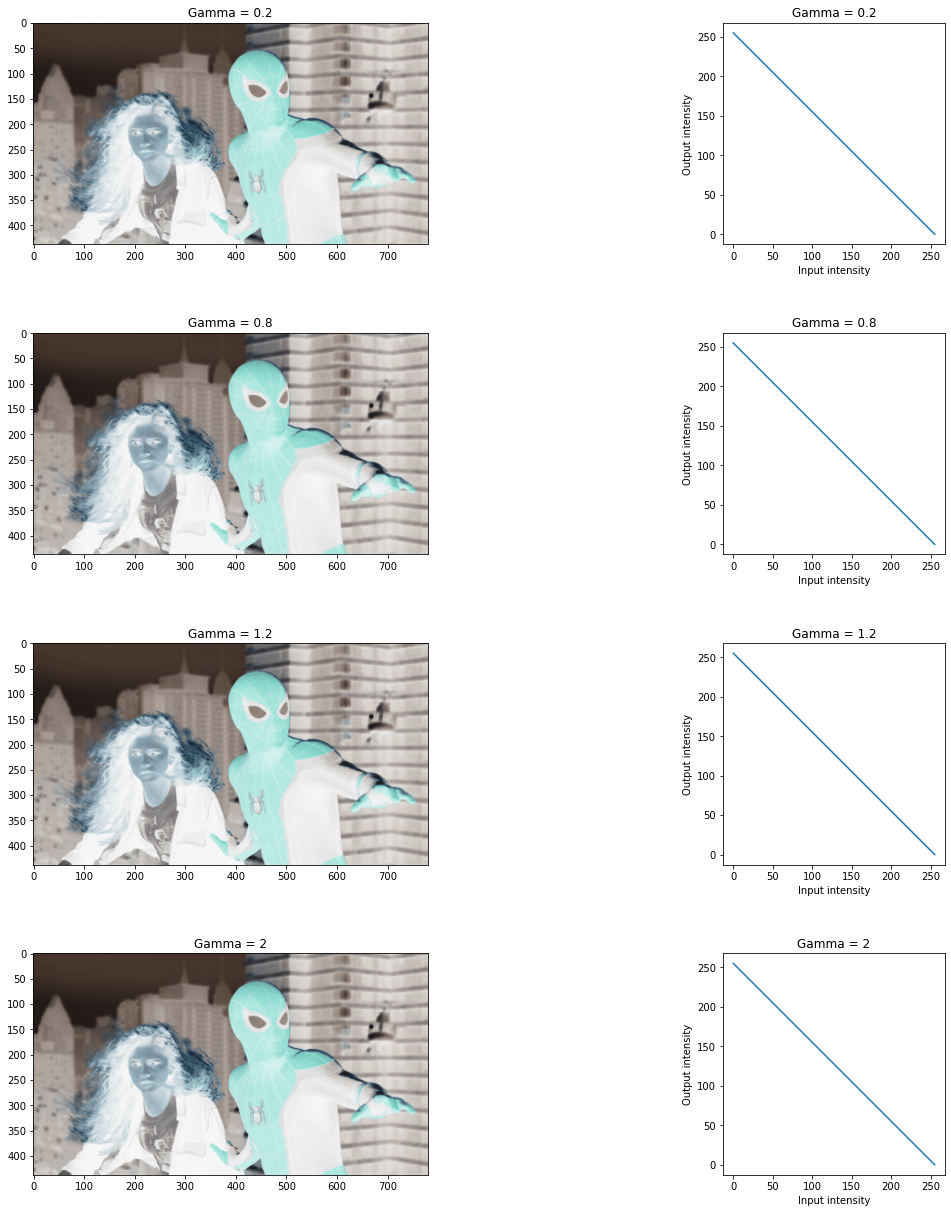

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'spider.png')
assert img is not None

fig,ax=plt.subplots(4,2,figsize=(20,20))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.4)
gamma=[0.2,0.8,1.2,2]
for i in range(len(gamma)):
    #transform=np.array([(p/255)**gamma[i]*255 for p in range(0,256)]).astype(np.uint8)
    transform = np.arange(255,-1,-1).astype('uint8')
    print(img[:20])
    print()
    img_new=cv.LUT(img,transform)
    print(img_new[:20])
    ax[i][0].imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB))
    ax[i][0].set_title('Gamma = '+str(gamma[i]))
    ax[i][1].plot(transform)
    ax[i][1].set_aspect('equal')
    ax[i][1].set_title('Gamma = '+str(gamma[i]))
    ax[i][1].set_xlabel('Input intensity')
    ax[i][1].set_ylabel('Output intensity')

    '''cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
    cv.imshow('Image',img)
    cv.waitKey(0)
    cv.imshow('Image',img_new)
    cv.waitKey(0)
    cv.destroyAllWindows()'''

"cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)\ncv.imshow('Image',img)\ncv.waitKey(0)\ncv.imshow('Image',img_new)\ncv.waitKey(0)\ncv.destroyAllWindows()"

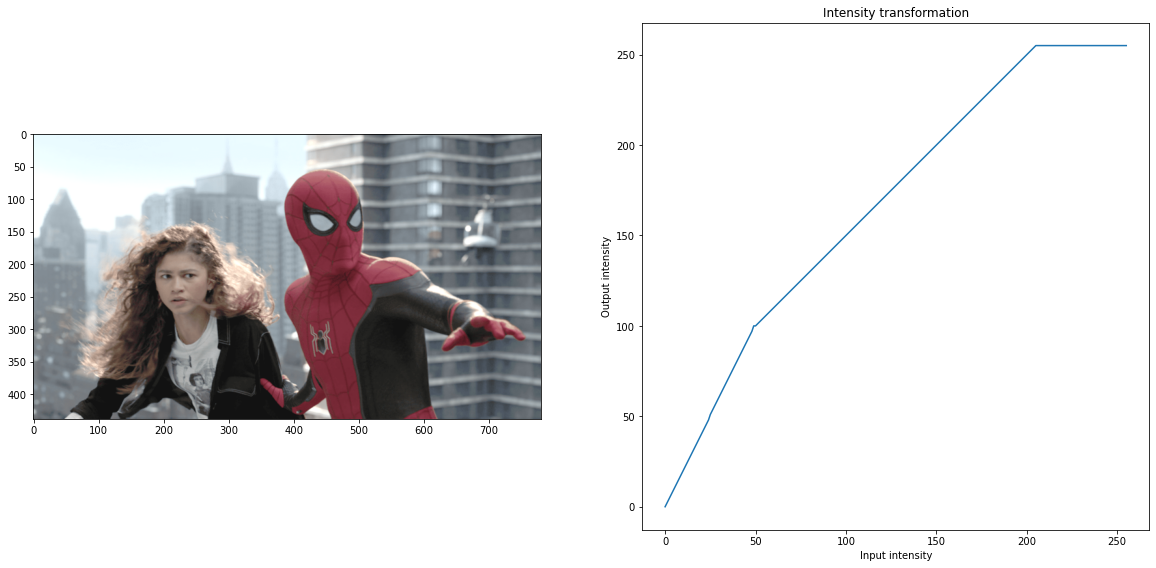

In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread(r'spider.png')
assert img is not None

range1=np.linspace(0,100,50)
range2=np.linspace(100,255,156)
range3=np.linspace(255,255,50)

transform=np.concatenate((range1,range2,range3),axis=0).astype(np.uint8)
fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB))

'''cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',img_new)
cv.waitKey(0)
cv.destroyAllWindows()'''

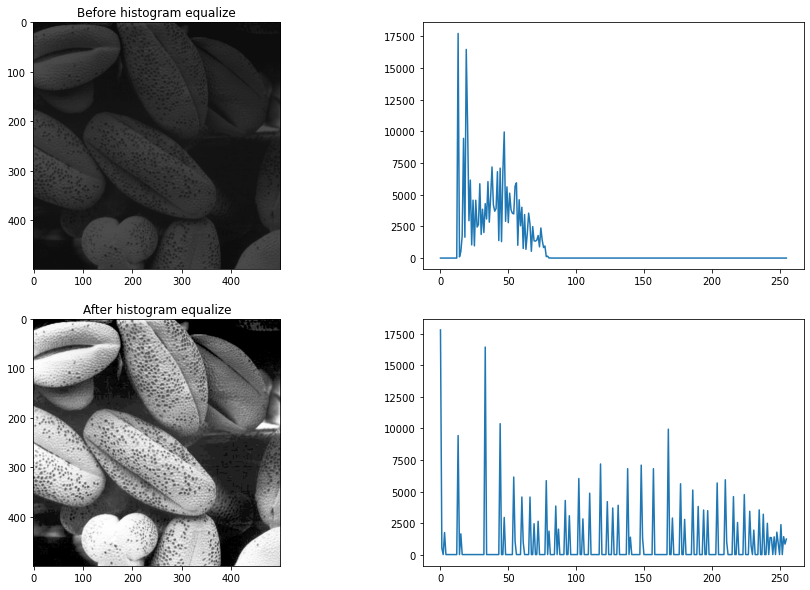

In [43]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread(r'shells.tif',cv.IMREAD_GRAYSCALE)
assert img is not None

hist_img=cv.calcHist([img],[0],None,[256],[0,256])
img_new=cv.equalizeHist(img)
hist_img_new=cv.calcHist([img_new],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0][0].set_title('Before histogram equalize')
ax[0][1].plot(hist_img)

ax[1][0].imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB))
ax[1][0].set_title('After histogram equalize')
ax[1][1].plot(hist_img_new)

"cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)\ncv.imshow('Image',img)\ncv.waitKey(0)\ncv.imshow('Image',img_hue)\ncv.waitKey(0)\ncv.destroyAllWindows()"

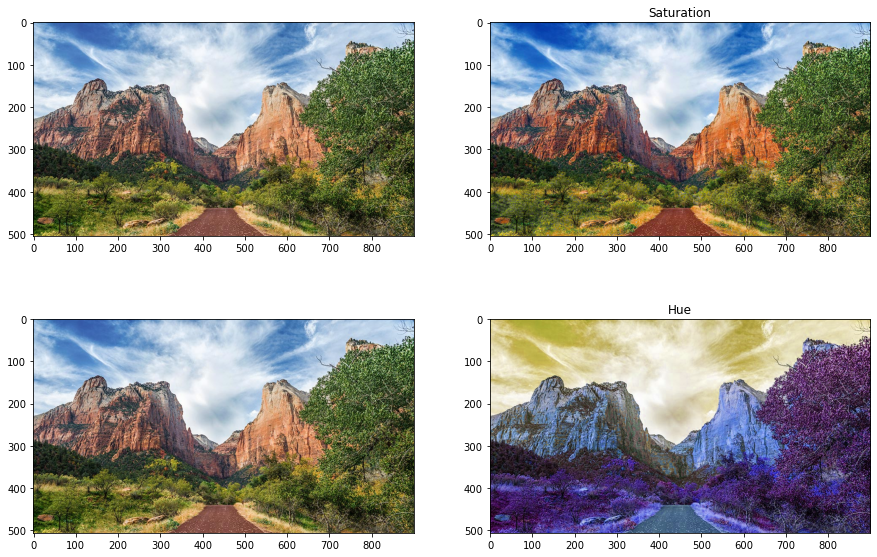

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread(r'zion_pass.jpg')
assert img is not None

sat_hsv=cv.cvtColor(img, cv.COLOR_BGR2HSV)
sat_hsv[:,:,1] = sat_hsv[:,:,1]*1.41

sat_hsv=np.clip(sat_hsv,0,255)

img_sat_arr = np.array(sat_hsv, dtype = np.uint8)
img_sat = cv.cvtColor(img_sat_arr, cv.COLOR_HSV2BGR)

hue_hsv=cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue_hsv[:,:,0] = hue_hsv[:,:,0]+100

hue_hsv=np.clip(hue_hsv,0,255)

img_hue_arr = np.array(hue_hsv, dtype = np.uint8)
img_hue = cv.cvtColor(img_hue_arr, cv.COLOR_HSV2BGR)

fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0][1].imshow(cv.cvtColor(img_sat, cv.COLOR_BGR2RGB))
ax[0][1].set_title('Saturation')
ax[1][0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(img_hue, cv.COLOR_BGR2RGB))
ax[1][1].set_title('Hue')

'''cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',img_hue)
cv.waitKey(0)
cv.destroyAllWindows()'''